# Pooriya Jamie - Genetic Algorithm for Clustering Iris Dataset

## Project Overview

Welcome to Pooriya Jamie's project on the implementation of a Genetic Algorithm for clustering the Iris dataset. In this project, we explore the application of genetic algorithms to optimize the clustering of Iris data, aiming to enhance the accuracy and efficiency of the clustering process.

## Project Details

- **Author:** Pooriya Jamie
- **Project Name:** Implementation of Genetic Algorithm for Clustering Iris Dataset

## Objectives

The primary objectives of this project include:

1. Developing and implementing a genetic algorithm tailored for clustering the Iris dataset.
2. Evaluating the algorithm's performance in optimizing the clustering process.
3. Analyzing the results and assessing the effectiveness of the genetic algorithm in enhancing clustering outcomes.

Feel free to explore the details of the implementation and outcomes in the following sections.


## Importing Libraries and Suppressing Warnings

This block imports the necessary libraries for the code, including pandas, numpy, random, matplotlib.pyplot, and sklearn.metrics. It also suppresses any future warnings that may occur during the code execution.

In [445]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn import metrics
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

## Loading and Preparing the Iris Dataset

This block reads the 'iris.data' file into a pandas DataFrame. It assigns column names to the DataFrame and displays the first 5 rows of the dataset.

In [446]:
iris = pd.read_csv('iris.data', header=None)
iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
iris

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## Creating the Initial Population

This block defines a function called first_population that generates an initial population of genotypes. Each genotype is represented as an array of random integers between 0 and 2. The function returns the generated genotypes as a numpy array.

In [447]:
def first_population(number_of_genotypes):
    genotypes = np.array([[random.randint(0, 2) for _ in range(150)] for _ in range(number_of_genotypes)])
    genotypes = np.array([np.append(genotypes[i], 0.0) for i in range(number_of_genotypes)])
    return genotypes

## Calculating Distance and Creating Clusters

This block defines a function called distance that calculates the distance between data points based on their assigned genotypes. It iterates through the genotype array and assigns data points to different clusters based on their genotype values. The function then retrieves the data points for each cluster from the iris dataset.

In [448]:
def distance(genotype):
    cluster0_indices, cluster1_indices, cluster2_indices = np.array([]), np.array([]), np.array([])
    
    for i in range(0, 150):
        if genotype[i] == 0:
            cluster0_indices = np.append(cluster0_indices, i)
        if genotype[i] == 1:
            cluster1_indices = np.append(cluster1_indices, i)
        if genotype[i] == 2:
            cluster2_indices = np.append(cluster2_indices, i)
            
    cluster0 = iris.iloc[cluster0_indices]
    cluster1 = iris.iloc[cluster1_indices]
    cluster2 = iris.iloc[cluster2_indices]

    difference0 = np.mean([np.linalg.norm(cluster0['sepal_length'] - cluster0['sepal_length'].mean()), np.linalg.norm(cluster0['sepal_width'] - cluster0['sepal_width'].mean()), np.linalg.norm(cluster0['petal_length'] - cluster0['petal_length'].mean()), np.linalg.norm(cluster0['petal_width'] - cluster0['petal_width'].mean())])
    difference1 = np.mean([np.linalg.norm(cluster1['sepal_length'] - cluster1['sepal_length'].mean()), np.linalg.norm(cluster1['sepal_width'] - cluster1['sepal_width'].mean()), np.linalg.norm(cluster1['petal_length'] - cluster1['petal_length'].mean()), np.linalg.norm(cluster1['petal_width'] - cluster1['petal_width'].mean())])
    difference2 = np.mean([np.linalg.norm(cluster2['sepal_length'] - cluster2['sepal_length'].mean()), np.linalg.norm(cluster2['sepal_width'] - cluster2['sepal_width'].mean()), np.linalg.norm(cluster2['petal_length'] - cluster2['petal_length'].mean()), np.linalg.norm(cluster2['petal_width'] - cluster2['petal_width'].mean())])

    size_of_cluster0, size_of_cluster1, size_of_cluster2 = len(cluster0) / 150, len(cluster1) / 150, len(cluster2) / 150
    
    difference = np.sum([difference0 * size_of_cluster0, difference1 * size_of_cluster1, difference2 * size_of_cluster2])
    
    return difference

## Genetic Algorithm Functions

### `distances(genotypes)`
Calculates distances for each genotype in the given list. Updates the last element of each genotype with the computed distance.

### `selection(genotypes, number_of_remaining_genotypes)`
Performs selection on genotypes based on their distances. Returns a subset of genotypes with the specified number of remaining genotypes.

### `mutation(child)`
Introduces mutation in the given child genotype by randomly changing one element.

In [449]:
def distances(genotypes):
    for genotype in genotypes:
        genotype[-1] = distance(genotype[:-1])
    return genotypes

def selection(genotypes, number_of_remaining_genotypes):
    sorted_genotypes = np.array(sorted(genotypes, key=lambda x: x[-1]))
    return sorted_genotypes[:number_of_remaining_genotypes]

def mutation(child):
    index = random.randint(0, 149)
    child[index] = random.randint(0, 2)
    return child

### `crossover(genotypes, number_of_children_per_couple, rate_of_mutations)`
Performs crossover among genotypes to generate new children. For each pair of parents, it creates a specified number of children with a mix of their genetic material. Mutation is applied to each child based on the given mutation rate.

- `genotypes`: List of genotypes to perform crossover on.
- `number_of_children_per_couple`: Number of children to be generated for each pair of parents.
- `rate_of_mutations`: Probability of applying mutation to each child.

Returns a new set of genotypes, including the original ones and the generated children.


In [450]:
def crossover(genotypes, number_of_children_per_couple, rate_of_mutations):
    new_genotypes = genotypes.copy()
    
    for parent1 in genotypes:
        for parent2 in genotypes:
            for _ in range(number_of_children_per_couple):
                child = np.array([random.randint(0, 1) for _ in range(150)])
                child = np.append(child, 0.0)
                
                for j in range(150):
                    if random.random() < 0.5:
                        child[j] = parent1[j]
                    else:
                        child[j] = parent2[j]
                
                if random.random() < rate_of_mutations:
                    child = mutation(child)
                    
                new_genotypes = np.append(new_genotypes, [child], axis=0)
                
    return new_genotypes

### `cluster_accuracy(predicted_labels)`

Compares predicted cluster labels with actual labels for the Iris dataset using various label mappings. Returns the best-matched labels and the corresponding accuracy.

- `predicted_labels`: Predicted cluster labels to be evaluated.

In [451]:
def cluster_accuracy(predicted_labels):
    actual_labels = iris['class']
    
    mappings = [
        {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2},
        {'Iris-setosa': 0, 'Iris-versicolor': 2, 'Iris-virginica': 1},
        {'Iris-setosa': 1, 'Iris-versicolor': 0, 'Iris-virginica': 2},
        {'Iris-setosa': 1, 'Iris-versicolor': 2, 'Iris-virginica': 0},
        {'Iris-setosa': 2, 'Iris-versicolor': 1, 'Iris-virginica': 0},
        {'Iris-setosa': 2, 'Iris-versicolor': 0, 'Iris-virginica': 1}
    ]
    
    accuracies = []
    best_labels = None
    
    for mapping in mappings:
        mapped_labels = actual_labels.map(mapping)
        accuracy = np.mean(mapped_labels == predicted_labels)
        accuracies.append(accuracy)
        
        if accuracy == max(accuracies):
            best_labels = mapped_labels
    
    return best_labels, metrics.accuracy_score(best_labels, predicted_labels)

# Genetic Algorithm Workflow

## Generate Initial Population

- Create an initial population of genotypes with 1000 individuals.

## Evaluate Distances for the Initial Population

- Calculate distances for each genotype in the initial population.

## Perform Selection

- Select a subset of genotypes based on their distances, keeping only 10 of the best-performing individuals.

## Iterate Over Generations (150 iterations)

For each generation:

1. Perform crossover and mutation on the current population to generate new genotypes.
2. Calculate distances for the new genotypes.
3. Perform selection on the new genotypes, keeping the best 10.
4. Print and store the best distance for the current generation.
5. Update the population with the new generation.


In [452]:
# Generate the initial population
first_population = first_population(number_of_genotypes=1000)

# Evaluate distances for the first population
first_population = distances(first_population)

# Perform selection
first_population = selection(first_population, number_of_remaining_genotypes=10)

# Create variables for storing the best distances
best_distances = []

print('First population is created')

# Iterate over generations
for i in range(150):
    # Perform crossover and mutation on the new genotypes
    new_genotypes = crossover(first_population, number_of_children_per_couple=2, rate_of_mutations=0.1)
    new_genotypes = distances(new_genotypes)
    new_genotypes = selection(new_genotypes, number_of_remaining_genotypes=10)
    
    # Print the best distance for the current generation
    best_distance = new_genotypes[0][-1]
    print(f'{i}: {best_distance}')
    
    # Store the best distance in the list
    best_distances.append(best_distance)
    
    # Update the first population with the new generation
    first_population = new_genotypes.copy()

First population is created
0: 6.20308092865327
1: 6.067624596443885
2: 5.8924303103614015
3: 5.764253225250471
4: 5.618687179906612
5: 5.4688538754428135
6: 5.312219360371753
7: 5.229684516811918
8: 5.1472291631089355
9: 5.012521083593258
10: 4.951362036789417
11: 4.921074192629474
12: 4.898436297472024
13: 4.85238343846971
14: 4.828675628821745
15: 4.77907900427656
16: 4.733065373404689
17: 4.715088530184406
18: 4.707468498694262
19: 4.629843215753263
20: 4.621595563423061
21: 4.608855548553086
22: 4.5942574915202705
23: 4.549441322794914
24: 4.5211766625659395
25: 4.506967313604181
26: 4.476174989671135
27: 4.460519886593839
28: 4.460519886593839
29: 4.337116041658417
30: 4.253587243265244
31: 4.211616627625296
32: 4.20250603680624
33: 4.141451797996021
34: 4.141451797996021
35: 4.064956610975155
36: 4.015057713231569
37: 4.005772726766014
38: 3.962394845172766
39: 3.9478686483550636
40: 3.895930600430272
41: 3.875399142231782
42: 3.8582161768827308
43: 3.820927677035637
44: 3.82092

In [453]:
best_genotype = new_genotypes[0]

In [454]:
predicted_labels = best_genotype[:-1]
best_labels, accuracy = cluster_accuracy(predicted_labels)

print('Accuracy: ' + str(accuracy))

Accuracy: 0.9066666666666666


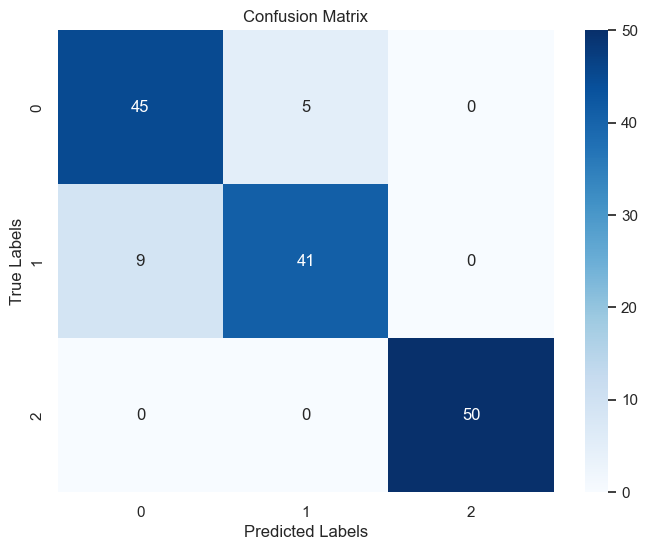

In [455]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate the confusion matrix
cm = confusion_matrix(best_labels, predicted_labels)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

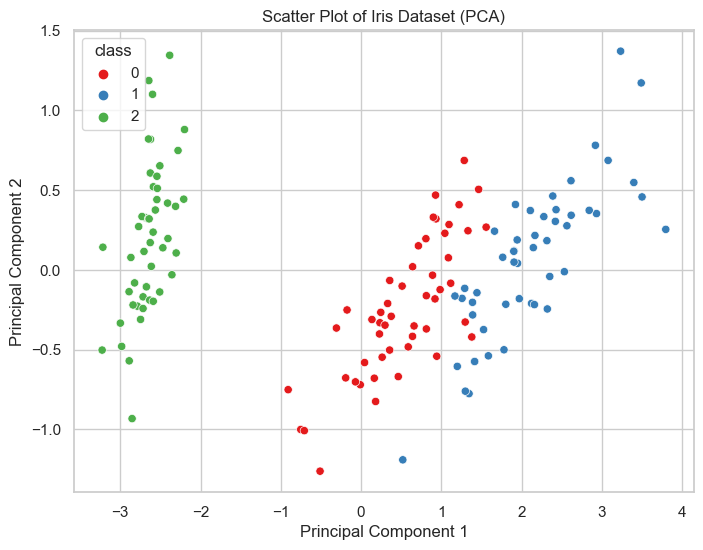

In [456]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Perform PCA
pca = PCA(n_components=2)
pca.fit(iris.iloc[:, :-1])
iris_pca = pca.transform(iris.iloc[:, :-1])

# Create the scatter plot with Seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(x=iris_pca[:, 0], y=iris_pca[:, 1], hue=best_labels, palette='Set1')

# Add labels and title
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot of Iris Dataset (PCA)')

# Show the plot
plt.show()

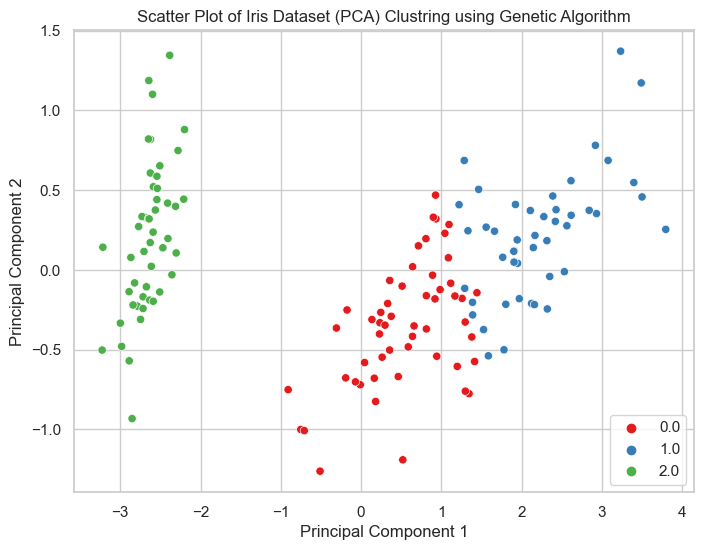

In [459]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Perform PCA
pca = PCA(n_components=2)
pca.fit(iris.iloc[:, :-1])
iris_pca = pca.transform(iris.iloc[:, :-1])

# Create the scatter plot with predicted_labels using Seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(x=iris_pca[:, 0], y=iris_pca[:, 1], hue=predicted_labels, palette='Set1')

# Add labels and title
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot of Iris Dataset (PCA) Clustring using Genetic Algorithm')

# Show the plot
plt.show()

# K-Means

Accuracy: 0.8866666666666667


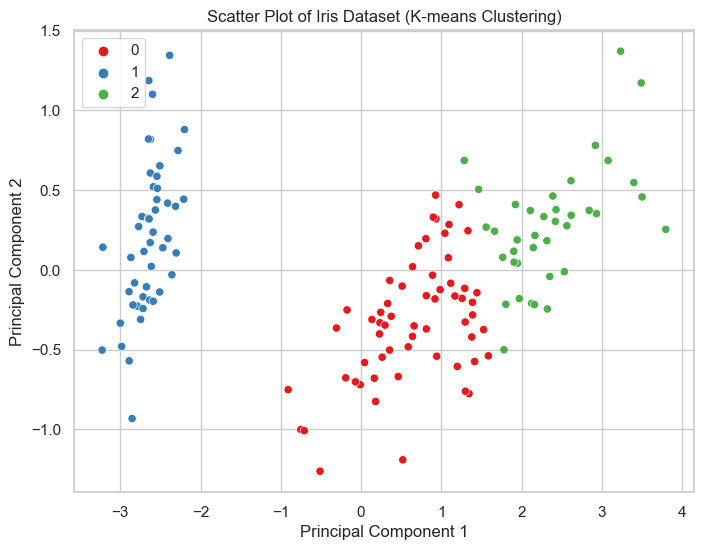

In [458]:
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=0).fit(iris_pca)
kmeans_labels = kmeans.labels_

# Calculate the accuracy of K-means clustering
_, kmeans_accuracy = cluster_accuracy(kmeans_labels)
print('Accuracy: ' + str(kmeans_accuracy))

# Create the scatter plot with K-means labels using Seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(x=iris_pca[:, 0], y=iris_pca[:, 1], hue=kmeans_labels, palette='Set1')

# Add labels and title
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot of Iris Dataset (K-means Clustering)')

# Show the plot
plt.show()